In [1]:
#加载实验所用到的库
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt

req_data = pd.read_csv('vgsales.csv')#加载实验数据
origin = req_data.iloc[:,1:]
print(origin.shape)
print(origin.dtypes)#粗略看下实验数据

(16598, 10)
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


# 电子游戏市场分析：受欢迎的游戏、类型、发布平台、发行人等；

In [2]:
def find(df, column):
    new_df = df.groupby(by=[str(column)])['Global_Sales'].sum()
    new_df = new_df.to_frame()
    new_df[str(column)] =new_df.index
    new_df = new_df.reset_index(drop= True)
    new_df = new_df.sort_values(axis = 0,ascending = False,by = 'Global_Sales')
    print(new_df)

In [3]:
def show_plots(b):
    prediction = origin.groupby(by=['Year'])[b].sum()
    prediction = prediction.to_frame()
    prediction['Year'] =prediction.index
    prediction = prediction.reset_index(drop= True)
    prediction = prediction.sort_values(axis = 0,ascending = False,by = b)
    
    x, y = [],[]
    for i in zip(prediction['Year'], prediction[b]):
        x.append(i[0]-min_year)
        y.append(i[1])
    
    plt.scatter(x,y,s=25)

    plt.title( "Relation in Year & "+str(b),fontsize=18 )
    plt.xlabel( "Year(since 1980)",fontsize=14 )
    plt.ylabel( str(b),fontsize=14 )

    # 设置刻度标记的大小
    plt.tick_params( axis='both',which='major',labelsize=12 )

    plt.show()

In [4]:
lenth = origin.shape[0]
welcomed = 0

for i in range(lenth):
    if( origin.iloc[welcomed,-1] >= 1 ):
        welcomed = welcomed + 1
    else:
        break

welcomed_data = origin.iloc[:welcomed,:]
#输出游戏最受欢迎的前十个
print('Welcomed Games: \n')
find(origin, 'Name')

#输出游戏受欢迎的类型
print('-----------------------------------------------------\nWelcomed Type and Selling: \n')
find(origin, 'Genre')

#输出游戏受欢迎的发布平台
print('-----------------------------------------------------\nWelcomed Plat and Selling: \n')
find(origin, 'Platform')

#输出游戏受欢迎的发行商
print('-----------------------------------------------------\nWelcomed Publisher and Selling: \n')
find(origin, 'Publisher')

Welcomed Games: 

       Global_Sales                                            Name
11007         82.74                                      Wii Sports
3712          55.92                              Grand Theft Auto V
9327          45.31                               Super Mario Bros.
9715          35.84                                          Tetris
5573          35.82                                  Mario Kart Wii
...             ...                                             ...
11026          0.01                     WinBack 2: Project Poseidon
9399           0.01                           Super Robot Taisen XO
2495           0.01              Dragon Quest X: All in One Package
2094           0.01                                         Deus Ex
4690           0.01  Junjou Romanchika: Koi no Doki Doki Daisakusen

[11493 rows x 2 columns]
-----------------------------------------------------
Welcomed Type and Selling: 

    Global_Sales         Genre
0        1751.18        Ac

# 预测每年电子游戏销售额。

In [ ]:
#预测每年电子游戏销售额。可以根据时间和销售额的关系构建模型。
#使用非线性模型对数据进行回归预测，通过调整模型维度，得到较为符合实际情况的结果。
#为了简化模型，对函数的自变量取值进行调整，即以最早的时间点作为零点。

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

prediction = origin.groupby(by=['Year'])['NA_Sales'].sum()
prediction = prediction.to_frame()
prediction['Year'] = prediction.index
prediction = prediction.reset_index(drop= True)
prediction = prediction.sort_values(axis = 0,ascending = False,by = 'NA_Sales')

min_year = 5000
x_data, y_data = [], []

for i in prediction['Year']:
    if( i < min_year ):
        min_year = i
#最小年设为零点
for i in zip(prediction['Year'], prediction['NA_Sales']):
    x_data.append([i[0]-min_year])
    y_data.append([i[1]])

poly_reg = PolynomialFeatures( degree = 5 )
x_poly = poly_reg.fit_transform( x_data )

linear_reg = LinearRegression()
linear_reg.fit(x_poly, y_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
for i in range(41,61): #year 2021-2040
    print("Prediction for Year "+str(int(i+min_year))+" :")
    x_new_poly = poly_reg.fit_transform([[i]])
    y_pred = linear_reg.predict(x_new_poly)
    print(y_pred[0,0])
    if(y_pred < 0):
        print("(Impossible)")

Prediction for Year 2021 :
-22.8876580835381
(Impossible)
Prediction for Year 2022 :
6.84967606985856
Prediction for Year 2023 :
63.73273162439409
Prediction for Year 2024 :
153.9091627366911
Prediction for Year 2025 :
284.1815130893706
Prediction for Year 2026 :
462.0360112107778
Prediction for Year 2027 :
695.671365794999
Prediction for Year 2028 :
994.02756102166
Prediction for Year 2029 :
1366.8146518757972
Prediction for Year 2030 :
1824.5415594678166
Prediction for Year 2031 :
2378.5448663532266
Prediction for Year 2032 :
3041.017611852742
Prediction for Year 2033 :
3825.0380873718937
Prediction for Year 2034 :
4744.598631721088
Prediction for Year 2035 :
5814.634426435452
Prediction for Year 2036 :
7051.0522910947
Prediction for Year 2037 :
8470.759478642922
Prediction for Year 2038 :
10091.692470708655
Prediction for Year 2039 :
11932.845772924597
Prediction for Year 2040 :
14014.300710247506


# 可视化应用

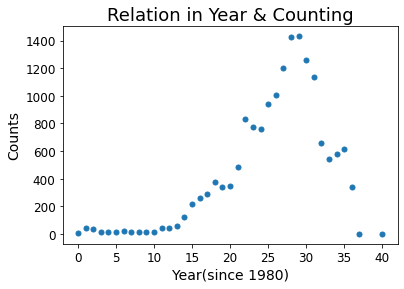

In [7]:
#观察发行量的时间走势
prediction = origin.groupby(by=['Year'])['Name'].count()
prediction = prediction.to_frame()
prediction['Year'] =prediction.index
prediction = prediction.reset_index(drop= True)
prediction = prediction.sort_values(axis = 0,ascending = False,by = 'Name')
x, y = [],[]
for i in zip(prediction['Year'], prediction['Name']):
    x.append(i[0]-min_year)
    y.append(i[1])

plt.scatter(x,y,s=25)

plt.title( "Relation in Year & Counting",fontsize=18 )
plt.xlabel( "Year(since 1980)",fontsize=14 )
plt.ylabel( "Counts",fontsize=14 )
# 设置刻度标记的大小
plt.tick_params( axis='both',which='major',labelsize=12 )
 
plt.show()

In [8]:
#观察平台发行量的时间走势
prediction = origin.groupby(by=['Year','Platform'])['Global_Sales'].sum()
a = pd.DataFrame(prediction)

plat_time_sales = []
for i in range(a.shape[0]):
    tmp = []
    tmp.append(a.index[i][1])
    if tmp not in plat_time_sales:
        plat_time_sales.append(tmp)
for i in plat_time_sales:
    empty = []
    empty_too = []
    i.append(empty)
    i.append(empty_too)

for i in range(a.shape[0]):
    for j in plat_time_sales:
        if a.index[i][1] in j:
            j[1].append(a.index[i][0])
            j[2].append(a.iloc[i]['Global_Sales'])

c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24067 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\wangjiajia\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 28216 missing from curren

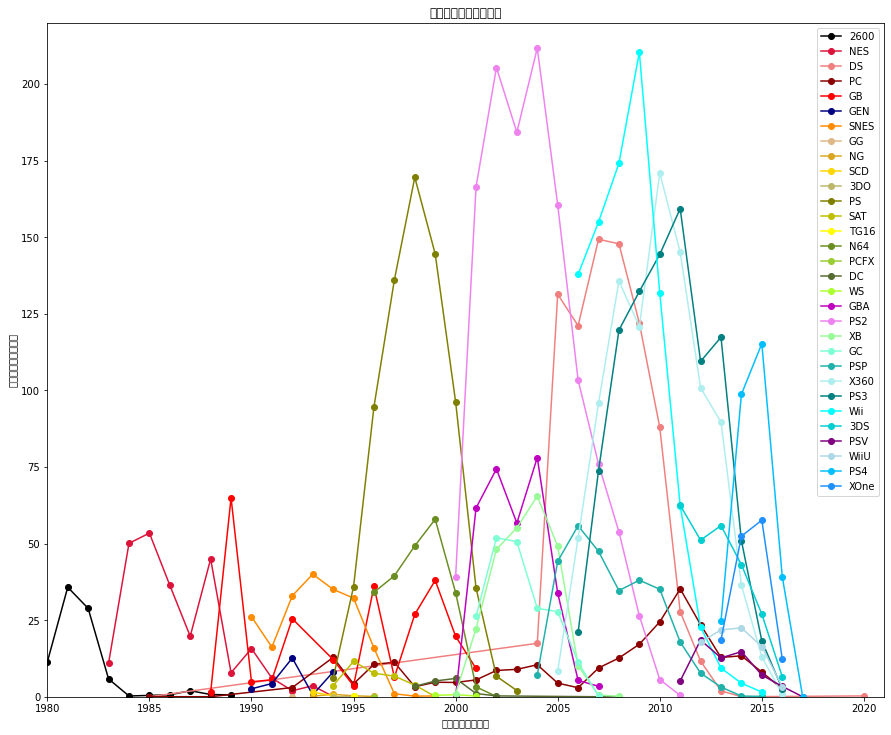

In [9]:
color = ['black','crimson','lightcoral','darkred','red','navy','darkorange','burlywood','goldenrod','gold','darkkhaki','olive','y','yellow','olivedrab','yellowgreen','darkolivegreen','greenyellow','m','violet','palegreen','aquamarine','lightseagreen','paleturquoise','teal','cyan','darkturquoise','purple','lightblue','deepskyblue','dodgerblue','blue']
plt.figure(figsize = (15,12))
cnt = 0
for i in plat_time_sales:
    plt.plot(i[1], i[2], marker='o',c = color[cnt],label=i[0])
    cnt = cnt+1

plt.legend()
plt.margins(0)
plt.subplots_adjust(bottom=0.10)
plt.xlabel('时间（单位：年）') #X轴标签
plt.ylabel("发行量（单位：个）") #Y轴标签
plt.xlim(1980, 2021)  # 限定横轴的范围
plt.ylim(0, 220)  # 限定横轴的范围
plt.title("平台发布游戏演化趋势") #标题
plt.show()

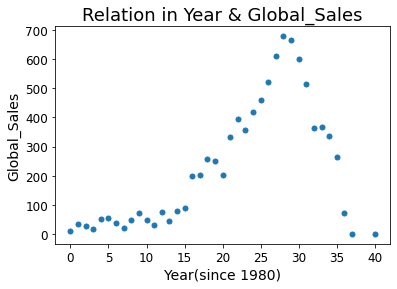

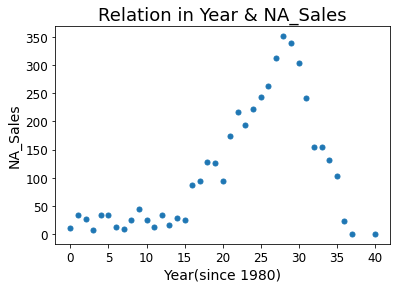

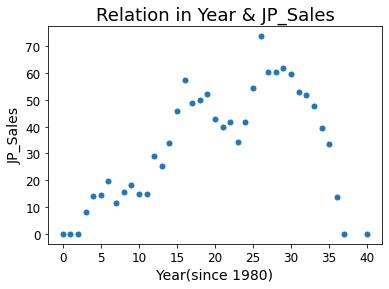

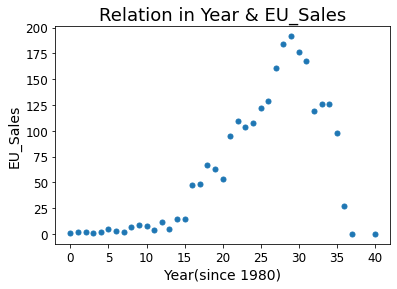

In [10]:
#观察主要区间销量的时间走势
show_plots('Global_Sales')
show_plots('NA_Sales')
show_plots('JP_Sales')
show_plots('EU_Sales')

In [ ]:
从上述数据图中可以看出，北美、欧洲和日本这三大主要市场的销量和全球销量走势相同，在2009年左右开始大幅度下滑，数据可以呈现出失常趋势，这个时间点
后，发布平台在逐渐增多，游戏发行平台在不断普及，游戏工作室也在兴起，导致后续数据统计出现不正常趋势，导致基于当时数据训练并预测的模型预测出
的数据并不具备较高的可信度。